# Website Phishing Data

### 📜 Background of data:

Got the data from here: https://www.kaggle.com/datasets/ahmednour/website-phishing-data-set

The phishing website data was originally taken from Phishtank data archive (www.phishtank.com). 'Phishtank' is a free community website where anyone can submit, verify, and share information about phishing websites. It is a collaborative effort to create a database of phishing sites that can be used to improve internet security. Here's how it generally works:

1. Submission: Users can submit URLs that they believe to be part of a phishing attempt. Typically, these are websites that try to trick visitors into giving away sensitive information like passwords, credit card numbers, or other personal data.
2. Verification: After a URL is submitted, it is not immediately considered as a phishing site. The PhishTank community participates in verifying these submissions. Users can vote whether they believe a submitted URL is a phishing site or not, and sometimes discuss and provide evidence for their decision.
3. Validation: Once enough votes are cast and if the majority of the users have classified the URL as a phishing attempt, the URL is then validated as a phishing, suspicious or legitimate site.

# Research questions:

What are the defining characteristics of phishing, suspicious, and legitimate websites? 

Which factor has the biggest influence in determining legitimacy?

Most importantly, can we get a reasonably high (85%+) accuracy score?

### 🗣️ Introduction:

The data came completely clean and was already converted into 'dummy' data. The data in its 10 columns came in the form of only 3 values:

1 = Legit

0 = Suspicious

-1 = Phishing

Such a dataset would relevent to the ecommerce industry in preventing fraudulent activity and fake phishing sites.

The data itself doesn't provide a lot of details on how the categorical labels were applied. For istance, is the URL length for phishing site considered a longer URL or a shorter URL? Are plentiful popup windows a strong signal for or against a site being labelled 'phishing'?

## ⚙️ Setting Up

In [1]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

## Avoid some version change warnings
import warnings
warnings.filterwarnings('ignore', message='numpy.dtype size changed')

In [2]:
phishing_data = "/Users/Timothy/Desktop/Datascience/Mini-project 2/Website Phishing.csv"

In [3]:
data = pd.read_csv(phishing_data)

## 🚀 Let's do some EDA!

In [4]:
data.shape

(1353, 10)

In [5]:
data.dtypes

SFH                  int64
popUpWidnow          int64
SSLfinal_State       int64
Request_URL          int64
URL_of_Anchor        int64
web_traffic          int64
URL_Length           int64
age_of_domain        int64
having_IP_Address    int64
Result               int64
dtype: object

In [6]:
data.columns

Index(['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor',
       'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address',
       'Result'],
      dtype='object')

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SFH,1353.0,0.237990,0.916389,-1.0,-1.0,1.0,1.0,1.0
popUpWidnow,1353.0,-0.258684,0.679072,-1.0,-1.0,0.0,0.0,1.0
SSLfinal_State,1353.0,0.327421,0.822193,-1.0,0.0,1.0,1.0,1.0
Request_URL,1353.0,-0.223208,0.799682,-1.0,-1.0,0.0,0.0,1.0
URL_of_Anchor,1353.0,-0.025129,0.936262,-1.0,-1.0,0.0,1.0,1.0
web_traffic,1353.0,0.000000,0.806776,-1.0,-1.0,0.0,1.0,1.0
URL_Length,1353.0,-0.053215,0.762552,-1.0,-1.0,0.0,1.0,1.0
age_of_domain,1353.0,0.219512,0.975970,-1.0,-1.0,1.0,1.0,1.0
having_IP_Address,1353.0,0.114560,0.318608,0.0,0.0,0.0,0.0,1.0
Result,1353.0,-0.113821,0.954773,-1.0,-1.0,-1.0,1.0,1.0


### Confirming null values status:

In [8]:
data.isnull().sum()

SFH                  0
popUpWidnow          0
SSLfinal_State       0
Request_URL          0
URL_of_Anchor        0
web_traffic          0
URL_Length           0
age_of_domain        0
having_IP_Address    0
Result               0
dtype: int64

In [9]:
data.isnull().any()

SFH                  False
popUpWidnow          False
SSLfinal_State       False
Request_URL          False
URL_of_Anchor        False
web_traffic          False
URL_Length           False
age_of_domain        False
having_IP_Address    False
Result               False
dtype: bool

#### No nulls found!

In [10]:
data.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [11]:
data.tail()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
1348,-1,-1,-1,-1,-1,-1,0,1,0,1
1349,-1,0,1,0,-1,0,0,1,0,-1
1350,-1,0,-1,-1,-1,0,-1,-1,0,1
1351,0,0,1,0,0,0,-1,1,0,1
1352,1,0,1,1,1,0,-1,-1,0,-1


### Encoding

In [12]:
#Here I've changed the values. I need to get rid of the negative number (-1) representing categorical data. 
# I changed the data values to prevent problems later in parameter tuning.

data = data.replace({-1: 0, 0: 1, 1: 2})

#### New values for the data are as follows:

**0 = phishing**

**1 = suspicious**

**2 = legit**

## 📊 Histogram Mania!

### Labelling of websites

In [61]:
import pandas as pd
import plotly.graph_objs as go

# Now using your DataFrame 'data' and 'Result' as your column of interest
result_counts = data['Result'].value_counts().rename(index={2: 'Legit', 1: 'Suspicious', 0: 'Phishing'})

colors = ['#39FF14', '#4D4DFF', '#FF69B4']  # neon colors for the histogram
labels = result_counts.index

# Using go.Bar to create a histogram
fig = go.Figure(data=[go.Bar(x=labels, y=result_counts.values, marker=dict(color=colors), text=result_counts.values, textposition='auto')])

fig.update_layout(
    title={
        'text': "Distribution of the 'Results' (Type of website)", 
        'x': 0.5,  # x=0.5 positions the title in the center of the chart
        'y': 0.9,  # y=0.9 positions the title a bit higher, closer to the top of the chart
        'xanchor': 'center',  # ensures the title will be centered at the specified x position
        'yanchor': 'top'  # ensures the title will be anchored at the top at the specified y position
    },
    plot_bgcolor='black',  # background color
    paper_bgcolor='Gray',  # background color outside the plot
    font=dict(color='white'),  # font color
    xaxis_title="Type of Website",
    yaxis_title="Count"
)

fig.show()

##### The 'Results' column in the histogram above show some skewness in the data.

### PopUp Windows -- Frequent Feature of Phishing Sites

In [62]:
import pandas as pd
import plotly.graph_objs as go

# Using your DataFrame 'data' and 'popUpWidnow' as your column of interest
popUp_counts = data['popUpWidnow'].value_counts().rename(index={2: 'Legit', 1: 'Suspicious', 0: 'Phishing'})

colors = ['#FFFF00', '#9400D3', '#FFA500']  # colors for the histogram
labels = popUp_counts.index

# Using go.Bar to create a histogram
fig = go.Figure(data=[go.Bar(x=labels, y=popUp_counts.values, marker=dict(color=colors), text=popUp_counts.values, textposition='auto')])

fig.update_layout(
    title={
        'text': "Distribution of PopUp Windows", 
        'x': 0.5,  # x=0.5 positions the title in the center of the chart
        'y': 0.9,  # y=0.9 positions the title a bit higher, closer to the top of the chart
        'xanchor': 'center',  # ensures the title will be centered at the specified x position
        'yanchor': 'top'  # ensures the title will be anchored at the top at the specified y position
    },
    plot_bgcolor='black',  # background color
    paper_bgcolor='white',  # background color outside the plot
    font=dict(color='black'),  # font color
    xaxis_title="Type of PopUp Window",
    yaxis_title="Count"
)

fig.show()

From the above data, it seems few legit sites use popup windows!

### URL Lengths

In [63]:
import pandas as pd
import plotly.graph_objs as go

# Using your DataFrame 'data' and 'URL_Length' as your column of interest
url_length_counts = data['URL_Length'].value_counts().rename(index={2: 'Legit', 1: 'Suspicious', 0: 'Phishing'})

colors = ['#00FFFF', '#FF00FF', '#AAFF00']  # new colors for the histogram
labels = url_length_counts.index

# Using go.Bar to create a histogram
fig = go.Figure(data=[go.Bar(x=labels, y=url_length_counts.values, marker=dict(color=colors), text=url_length_counts.values, textposition='auto')])

fig.update_layout(
    title={
        'text': "Distribution of URL Lengths", 
        'x': 0.5,  # x=0.5 positions the title in the center of the chart
        'y': 0.9,  # y=0.9 positions the title a bit higher, closer to the top of the chart
        'xanchor': 'center',  # ensures the title will be centered at the specified x position
        'yanchor': 'top'  # ensures the title will be anchored at the top at the specified y position
    },
    plot_bgcolor='black',  # background color
    paper_bgcolor='orange',  # background color outside the plot
    font=dict(color='black'),  # font color
    xaxis_title="Type of URL Length",
    yaxis_title="Count"
)

fig.show()

Generally, URL lengths seem to influence strongly if a site is considered legit.

### Server Form Handlers - SFH

In [64]:
import pandas as pd
import plotly.graph_objs as go

# Using your DataFrame 'data' and 'SFH' as your column of interest
sfh_counts = data['SFH'].value_counts().rename(index={2: 'Legit', 1: 'Suspicious', 0: 'Phishing'})

colors = ['#FF7F50', '#FF1493', '#00FFFF']  # new colors for the histogram
labels = sfh_counts.index

# Using go.Bar to create a histogram
fig = go.Figure(data=[go.Bar(x=labels, y=sfh_counts.values, marker=dict(color=colors), text=sfh_counts.values, textposition='auto')])

fig.update_layout(
    title={
        'text': "Distribution of Server Form Handlers", 
        'x': 0.5,  # x=0.5 positions the title in the center of the chart
        'y': 0.9,  # y=0.9 positions the title a bit higher, closer to the top of the chart
        'xanchor': 'center',  # ensures the title will be centered at the specified x position
        'yanchor': 'top'  # ensures the title will be anchored at the top at the specified y position
    },
    plot_bgcolor='black',  # background color
    paper_bgcolor='gray',  # background color outside the plot
    font=dict(color='white'),  # font color
    xaxis_title="Type of Server Form Handlers",
    yaxis_title="Count"
)

fig.show()

### Correlations:

In [17]:
data.corr()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
SFH,1.000000,0.375943,0.368690,0.257247,0.333703,-0.187082,0.151503,0.163182,0.043349,-0.678277
popUpWidnow,0.375943,1.000000,0.218050,0.111520,0.167760,-0.140407,0.136229,0.076815,0.123399,-0.509749
SSLfinal_State,0.368690,0.218050,1.000000,0.057239,0.088525,-0.171719,0.095055,0.208091,0.108000,-0.518762
Request_URL,0.257247,0.111520,0.057239,1.000000,0.337277,-0.045858,0.048431,0.053348,0.013346,-0.271609
URL_of_Anchor,0.333703,0.167760,0.088525,0.337277,1.000000,-0.092045,0.097581,0.069178,0.039412,-0.287007
web_traffic,-0.187082,-0.140407,-0.171719,-0.045858,-0.092045,1.000000,-0.108204,-0.683857,-0.094957,0.243896
URL_Length,0.151503,0.136229,0.095055,0.048431,0.097581,-0.108204,1.000000,0.075338,0.165152,-0.183061
age_of_domain,0.163182,0.076815,0.208091,0.053348,0.069178,-0.683857,0.075338,1.000000,0.040379,-0.231931
having_IP_Address,0.043349,0.123399,0.108000,0.013346,0.039412,-0.094957,0.165152,0.040379,1.000000,-0.059225
Result,-0.678277,-0.509749,-0.518762,-0.271609,-0.287007,0.243896,-0.183061,-0.231931,-0.059225,1.000000


# 📈 Models

## ✈️ Logistic Regression

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Define your features and target
X = data.drop('Result', axis=1)
y = data['Result']

# Initialize the model (you could change to a different model if desired)
logreg = LogisticRegression()

# Initialize RFE
rfe = RFE(estimator=logreg , n_features_to_select=4)  # here we select top 5 features, you can modify this

# Fit RFE
rfe = rfe.fit(X, y)

# Print the features and their ranking (high = dropped early on)
print("Feature Ranking: ", rfe.ranking_)

# Print the features that were selected: those with a rank of 1
selected_features = X.columns[rfe.support_]
print("Selected Features: ", selected_features)

Feature Ranking:  [1 1 1 1 5 4 2 6 3]
Selected Features:  Index(['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL'], dtype='object')


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Print the accuracy score
print("📉 Accuracy Score: ", accuracy_score(y_test, y_pred))


📉 Accuracy Score:  0.7970479704797048


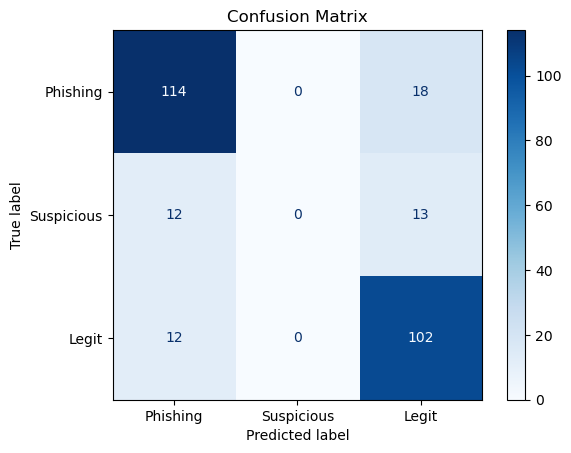

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming your model is 'clf' and X_test, y_test are your test data and labels

# Define class names
class_names = ['Phishing', 'Suspicious', 'Legit']

# Plot non-normalized confusion matrix using the new method
disp = ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, 
                                             display_labels=class_names, 
                                             cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## 🌲 Random Forest Classifier

### Feature Engineering:

In [20]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rfc = RandomForestClassifier()

# Initialize RFE
rfe = RFE(estimator=rfc, n_features_to_select=4)  # here selected the top features

# Fit RFE
rfe = rfe.fit(X, y)

# Print the features and their ranking (high = dropped early on)
print("Feature Ranking: ", rfe.ranking_)

# Print the features that were selected: those with a rank of 1
selected_features = X.columns[rfe.support_]
print("Selected Features: ", selected_features)

Feature Ranking:  [1 1 1 1 2 4 3 5 6]
Selected Features:  Index(['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL'], dtype='object')


### Fitting the model:

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Print the accuracy score
print("📉 Accuracy Score: ", accuracy_score(y_test, y_pred))

📉 Accuracy Score:  0.8597785977859779


### 🤷 Confusion Matrix for the 'Random Forest Classifier':

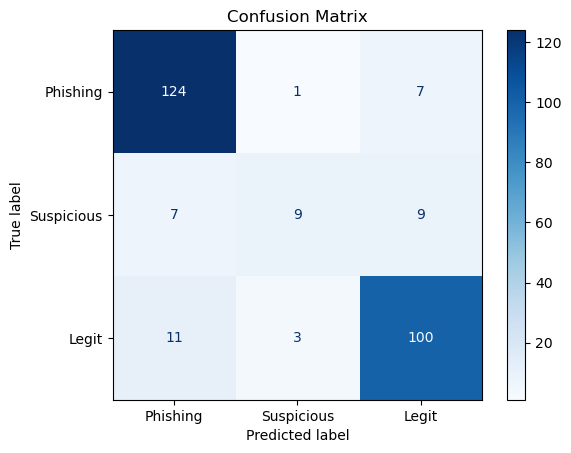

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming your model is 'clf' and X_test, y_test are your test data and labels

# Define class names
class_names = ['Phishing', 'Suspicious', 'Legit']

# Plot non-normalized confusion matrix using the new method
disp = ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test, 
                                             display_labels=class_names, 
                                             cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## 🌳 Decision Tree Classifier

### Feature Engineering:

In [22]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dtc = DecisionTreeClassifier()

# Initialize RFE
rfe = RFE(estimator=dtc, n_features_to_select=5)  # here selected top features

# Fit RFE
rfe = rfe.fit(X, y)

# Print the features and their ranking (high = dropped early on)
print("Feature Ranking: ", rfe.ranking_)

# Print the features that were selected: those with a rank of 1
selected_features = X.columns[rfe.support_]
print("Selected Features: ", selected_features)

Feature Ranking:  [1 1 1 1 1 3 2 4 5]
Selected Features:  Index(['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor'], dtype='object')


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Fit the model on the training data
dtc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtc.predict(X_test)

# Print the accuracy score
print("📉 Accuracy Score: ", accuracy_score(y_test, y_pred))

📉 Accuracy Score:  0.8597785977859779


### 🤷 Confusion matrix for 'Decision Tree Classifier':

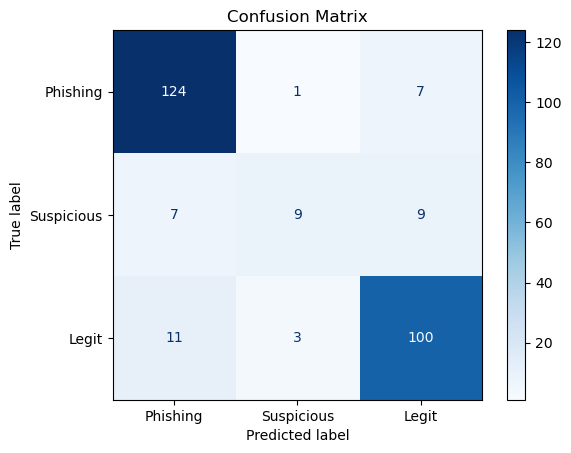

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming your model is 'clf' and X_test, y_test are your test data and labels

# Define class names
class_names = ['Phishing', 'Suspicious', 'Legit']

# Plot non-normalized confusion matrix using the new method
disp = ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test, 
                                             display_labels=class_names, 
                                             cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## 📚 Stacking Ensemble ML Model:

### Tuning params:

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Define the models and their parameter grids
models_and_params = {
    'XGB': {
        'model': XGBClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    'RFC': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10]
        }
    },
    'LGBM': {
        'model': LGBMClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    'GBC': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    }
}

# Tune the parameters for each model
for model_name, model_info in models_and_params.items():
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model_name}: ", grid_search.best_params_)
    print(f"Best score for {model_name}: ", grid_search.best_score_)

Best parameters for XGB:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best score for XGB:  0.8826292882744495
Best parameters for RFC:  {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best score for RFC:  0.8844726062467998
Best parameters for LGBM:  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Best score for LGBM:  0.8854027991124767
Best parameters for GBC:  {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100}
Best score for GBC:  0.8844640723672981


### Tuned params made no difference:

In [65]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Define the base models with their best parameters
base_models = [
    ('XGB', XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=200, random_state=42)),
    ('RFC', RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=100, random_state=42)),
    ('LGBM', LGBMClassifier(learning_rate=0.2, max_depth=5, n_estimators=100, random_state=42)),
    ('GBC', GradientBoostingClassifier(learning_rate=0.01, max_depth=7, n_estimators=100, random_state=42))
]

# Define the second-level model
second_level_model = LogisticRegression()

# Define the stacking model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=second_level_model)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions on new data
predictions = stacking_model.predict(X_test)

# Evaluate the model using accuracy
accuracy3 = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy3)

Accuracy: 0.8597785977859779


### 🤷 Confusion matrix:

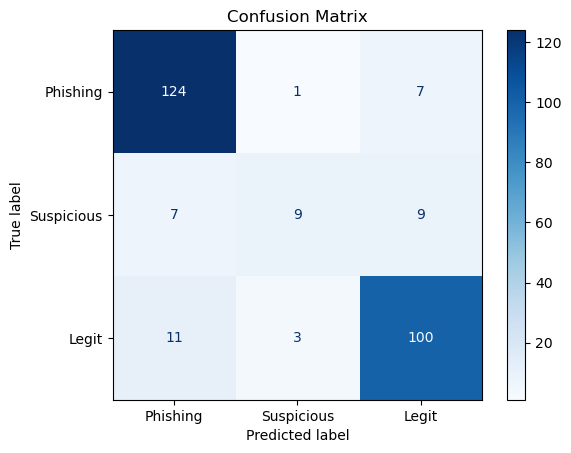

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming your model is 'clf' and X_test, y_test are your test data and labels

# Define class names
class_names = ['Phishing', 'Suspicious', 'Legit']

# Plot non-normalized confusion matrix using the new method
disp = ConfusionMatrixDisplay.from_estimator(stacking_model, X_test, y_test, 
                                             display_labels=class_names, 
                                             cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## 🚀 Gradient Boosting Classifier:

### Tuning params:

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

# Define an even broader parameter grid
param_grid = {
    'learning_rate': sp_randFloat(0.001, 1.0),   # expanded range
    'n_estimators': sp_randInt(10, 500),         # expanded range
    'max_depth': sp_randInt(1, 20),              # expanded range
    'min_samples_split': sp_randInt(2, 20),      # expanded range
    'min_samples_leaf': sp_randInt(1, 20)        # expanded range
}

# Instantiate the model
gbc = GradientBoostingClassifier(random_state=42)

# Set up the randomized search with broader parameters
random_search = RandomizedSearchCV(gbc, param_distributions=param_grid, n_iter=200, cv=5, random_state=42, verbose=1)

# Run the randomized search
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Evaluate on the test set
y_pred = random_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters: {'learning_rate': 0.49498148713086265, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 406}
Best score: 0.8844854070660523
Accuracy on the test set: 0.8597785977859779


### With tuned params:

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train the model with the new parameters
gbc2 = GradientBoostingClassifier(
    learning_rate=0.49498148713086265, 
    max_depth=10, 
    min_samples_leaf=1, 
    min_samples_split=7, 
    n_estimators=406,
    random_state=42)

gbc2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbc2.predict(X_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.8597785977859779


### 🤷 Confusion Matrix w/ tuned params:

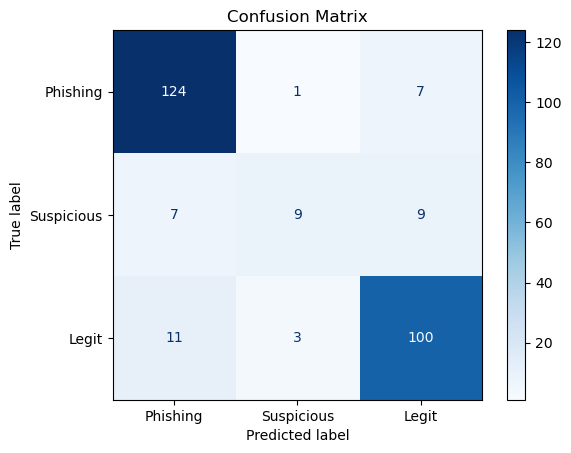

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming your model is 'clf' and X_test, y_test are your test data and labels

# Define class names
class_names = ['Phishing', 'Suspicious', 'Legit']

# Plot non-normalized confusion matrix using the new method
disp = ConfusionMatrixDisplay.from_estimator(gbc2, X_test, y_test, 
                                             display_labels=class_names, 
                                             cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### WITHOUT tuned params - Best model:

In [68]:
# Train the model with the best parameters
gbc3 = GradientBoostingClassifier(random_state=42)
gbc3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbc3.predict(X_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.8782287822878229


### 🤷 Confusion matrix WITHOUT tuned params:

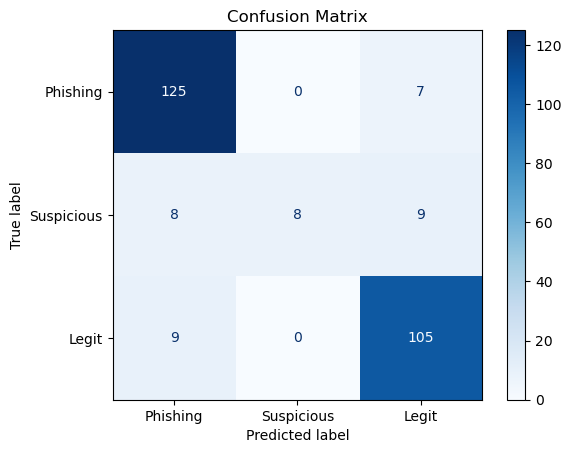

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming your model is 'clf' and X_test, y_test are your test data and labels

# Define class names
class_names = ['Phishing', 'Suspicious', 'Legit']

# Plot non-normalized confusion matrix using the new method
disp = ConfusionMatrixDisplay.from_estimator(gbc3, X_test, y_test, 
                                             display_labels=class_names, 
                                             cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## ROC (WITHOUT TUNED PARAMETERS)

ROC AUC Score: 0.953006712681668


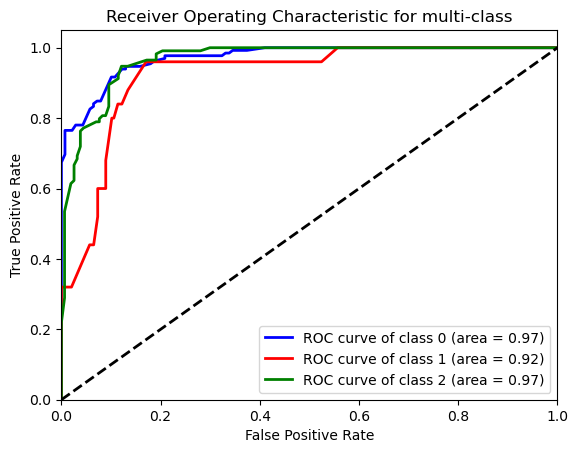

In [70]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adapt the classes list to your case
y_prob = gbc3.predict_proba(X_test)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test_binarized, y_prob, multi_class="ovr", average="macro")
print(f"ROC AUC Score: {roc_auc}")

# Plotting ROC curves for each class
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])

# Plot the ROC Curve
plt.figure()
colors = ['blue', 'red', 'green']  # Define colors for the different class curves
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

### Cross Validation (WITHOUT tuned params)

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the classifier
gbc3 = GradientBoostingClassifier(random_state=42)

# Perform 5-fold cross-validation
scores = cross_val_score(gbc3, X_train, y_train, cv=5, scoring=make_scorer(accuracy_score))

# Print the scores
print("Accuracy scores:", scores)

# Print the average of the scores
print("Average Accuracy on 5-fold Cross Validation:", scores.mean())

Accuracy scores: [0.89861751 0.86635945 0.86574074 0.89814815 0.875     ]
Average Accuracy on 5-fold Cross Validation: 0.8807731694828469


Performed even slightly better with cross validation.

#### Generally speaking, the ROC curve seems to be alright.

# Conclusion:

The final 'Gradient Boosting Classifier' without the tuned parameters performed best at 88% accuracy score. While I thought the tuning of parameters would yield better results, perhaps the scope of param search wasn't broad enough. My

**From the confusion matrix, here's the summary findings:**

- 125 'Phishing' sites were correctly classified.
- 8 'Suspicious' sites were correctly classified.
- 105 'Legit' sites were correctly classified.

Due to the nature of the problem, businesses generally when a approaching this sort of problem would think about 'erroring on the side of safety'. So, for instance I don't consider it a major problem that 9 'Legit' sites were classified as 'Phishing'. Additionally, I have no problem with 8 'Suspicious' sites being outright labelled as 'Phishing'.

From within the confusion maxtrix, the greatest concern will obviously be from two areas in the confusion matrix.

1. There are 7 true 'Phishing' sites which are labelled as 'Legit'.
2. Perhaps less dangerous but still an issue are the 9 'Suspicious' sites which are getting labelled 'Legit'.

So, with this model you basically be running a risk 6% of the time. (7 + 9/271)

Ideally, such a model would be useful to companies that are constantly being bombarded by phishing emails which link to phishing sites. With hundreds of employees, the probability of company employees clicking on one of these sites is much higher. The effects of giving away private company information could furthermore be disasterous. Thus, it would be practical to integrate this type of model into a spam filters or browser plugins as an extra layer of protection.